# 仮説検定

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import lmdiag

In [2]:
iris = sns.load_dataset('iris')
iris.head(n = 5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


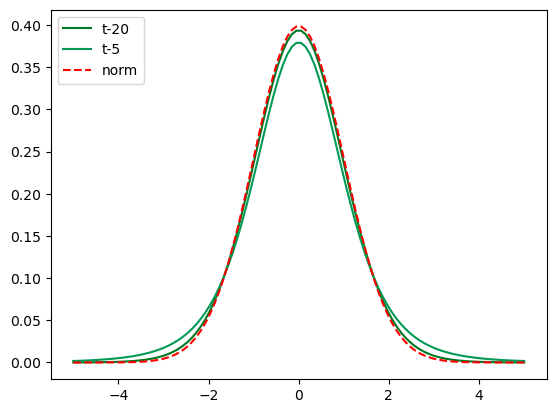

In [3]:
# Figureを設定
fig = plt.figure()

# Axesを追加
ax = fig.add_subplot(111)

x = np.linspace(-5, 5, 100)
ax.plot(x, ss.t(20).pdf(x), color="#007722", label="t-20")
ax.plot(x, ss.t(5).pdf(x), color="#009955", label="t-5")
ax.plot(x, ss.norm(0, 1).pdf(x),color = "red", label="norm", linestyle="dashed")
ax.legend(loc = 'upper left')

In [4]:
# 正規分布とT分布で検定
weight = np.array([12, 14, 15, 14, 11, 16, 16, 19])

xbar = np.mean(weight)
s = np.std(weight, ddof=1)

# 正規分布
lwr1 = xbar - 1.96 * s / np.sqrt(len(weight))
upper1 = xbar + 1.96 * s / np.sqrt(len(weight))
print(f"正規分布{lwr1} - {upper1}")

# t分布
lwr2 = xbar + ss.t(len(weight) - 1).ppf(0.025) * s /np.sqrt(len(weight))
upper2 = xbar + ss.t(len(weight) - 1).ppf(0.975) * s /np.sqrt(len(weight))
print(f"T分布{lwr2} - {upper2}")

正規分布12.890115277604878 - 16.359884722395122
T分布12.531964037100623 - 16.718035962899375


In [5]:
# 関数を使う
print(ss.norm.interval(alpha=0.95, loc=xbar, scale=s/np.sqrt(len(weight))))
print(ss.t.interval(alpha=0.95, df=len(weight)-1, loc=xbar, scale=s/np.sqrt(len(weight))))

(12.89014715651877, 16.359852843481228)
(12.531964037100625, 16.718035962899375)


In [6]:
import statsmodels.formula.api as smf
m_d = pd.read_csv("./data/Mansion1.csv")

model1 = smf.ols(formula='rent ~ space', data = m_d)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     334.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           1.14e-38
Time:                        14:29:58   Log-Likelihood:                -1493.4
No. Observations:                 140   AIC:                             2991.
Df Residuals:                     138   BIC:                             2997.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.579e+04   3179.976     14.400      0.000    3.95e+04    5.21e+04
space       2075.1455    113.553     18.275      0.000    1850.617    2299.674
==============================================================================
Omnibus:                        6.374   Durbin-Watson:                   1.308
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                6.691
Skew:                           0.352   Prob(JB):                       0.0352
Kurtosis:                       3.808   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
model2 = smf.ols(formula = 'rent ~ distance + floorPlan + space + direction + age', data=m_d)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     40.84
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           3.85e-42
Time:                        14:29:58   Log-Likelihood:                -1446.4
No. Observations:                 140   AIC:                             2929.
Df Residuals:                     122   BIC:                             2982.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.215e+04   1.14e+04      3.703      0.000    1.96e+04    6.47e+04
distance[T.B]      -8131.7828   1488.182     -5.464      0.000   -1.11e+04   -5185.778
floorPlan[T.1K]    -1185.6327   4207.411     -0.282      0.779   -9514.624    7143.358
floorPlan[T.1LDK]   -435.5080   4400.231     -0.099      0.921   -9146.204    8275.188
floorPlan[T.1R]     5532.5310   4791.241      1.155      0.250   -3952.209     1.5e+04
floorPlan[T.1SLDK] -1.886e+04   1.06e+04     -1.779      0.078   -3.98e+04    2127.005
floorPlan[T.2DK]   -9127.6323   5384.814     -1.695      0.093   -1.98e+04    1532.146
floorPlan[T.2K]     1715.5228   9077.955      0.189      0.850   -1.63e+04    1.97e+04
floorPlan[T.2LDK]  -4.009e+04   1.11e+04     -3.611      0.000   -6.21e+04   -1.81e+04
direction[T.北東]     -783.6430   8750.302     -0.090      0.929   -1.81e+04    1.65e+04
direction[T.北西]    -4190.1981   8639.198     -0.485      0.629   -2.13e+04    1.29e+04
direction[T.南]     -2227.7685   8167.319     -0.273      0.785   -1.84e+04    1.39e+04
direction[T.南東]     1266.8274   8161.010      0.155      0.877   -1.49e+04    1.74e+04
direction[T.南西]    -3084.3765   8354.896     -0.369      0.713   -1.96e+04    1.35e+04
direction[T.東]     -2150.3998   8185.271     -0.263      0.793   -1.84e+04    1.41e+04
direction[T.西]     -4075.5925   8239.112     -0.495      0.622   -2.04e+04    1.22e+04
space               2719.4847    207.600     13.100      0.000    2308.520    3130.450
age                 -652.6729    194.068     -3.363      0.001   -1036.849    -268.497
==============================================================================
Omnibus:                        5.014   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                7.162
Skew:                           0.013   Prob(JB):                       0.0278
Kurtosis:                       4.108   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# 回帰係数だけを示すなら params
result2.params

Intercept             42145.163840
distance[T.B]         -8131.782806
floorPlan[T.1K]       -1185.632698
floorPlan[T.1LDK]      -435.508016
floorPlan[T.1R]        5532.531044
floorPlan[T.1SLDK]   -18857.542426
floorPlan[T.2DK]      -9127.632282
floorPlan[T.2K]        1715.522773
floorPlan[T.2LDK]    -40086.611209
direction[T.北東]        -783.642961
direction[T.北西]       -4190.198054
direction[T.南]        -2227.768508
direction[T.南東]        1266.827425
direction[T.南西]       -3084.376491
direction[T.東]        -2150.399831
direction[T.西]        -4075.592513
space                  2719.484716
age                    -652.672881
dtype: float64

In [9]:
# 予測値の信頼区間、予測区間などがわかる
predictions = result2.get_prediction()
predictions.summary_frame(alpha=0.05).head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,72590.290844,2117.030003,68399.418507,76781.163181,56294.800971,88885.780716
1,74438.114849,1887.682826,70701.258156,78174.971542,58253.440704,90622.788994
2,71170.339540,3538.079806,64166.357187,78174.321894,53935.626080,88405.053000
3,73132.769086,2007.917203,69157.896435,77107.641737,56891.488600,89374.049573
4,65518.194630,2387.571226,60791.758921,70244.630339,49076.820790,81959.568470


# 残差

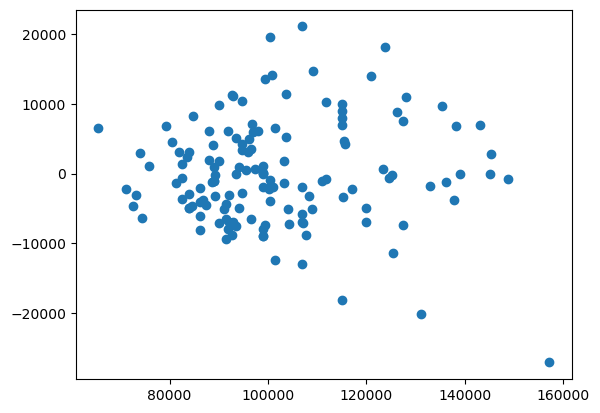

In [10]:
train_residual = plt.scatter(result2.predict(), (m_d['rent']- result2.predict()))

/Users/kunia/opt/anaconda3/envs/practice2/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:696: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


(array([76]),)

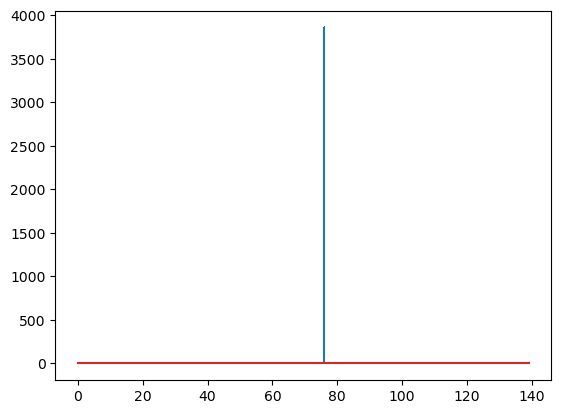

In [11]:
# クック距離を見られる
influence = result2.get_influence()
c ,p = influence.cooks_distance
plt.stem(np.arange(len(m_d)), c, markerfmt=",")

# cook 距離が 0.3以上を取得
np.where(c>0.3)

### 回帰診断も　pythonでできそう
- https://py4etrics.github.io/10_Residuals.html
- 公式ドキュメント

<module 'matplotlib.pyplot' from '/Users/kunia/opt/anaconda3/envs/practice2/lib/python3.9/site-packages/matplotlib/pyplot.py'>

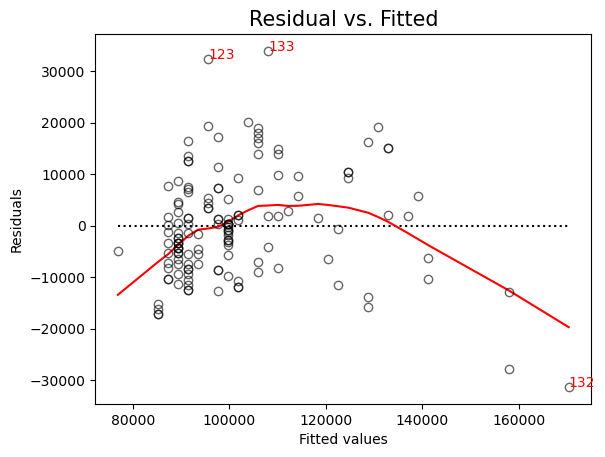

In [12]:
# 回帰診断
lmdiag.resid_fit(result1)

<module 'matplotlib.pyplot' from '/Users/kunia/opt/anaconda3/envs/practice2/lib/python3.9/site-packages/matplotlib/pyplot.py'>

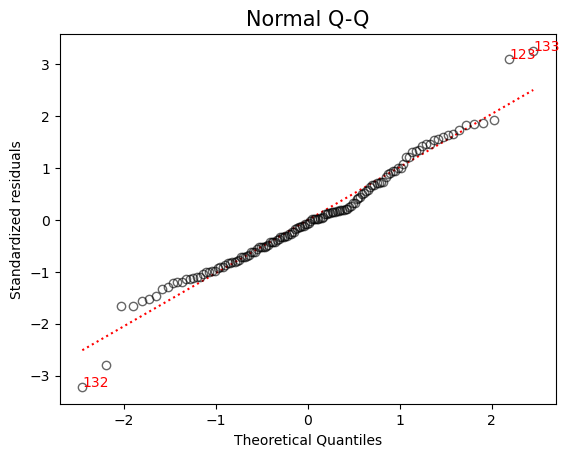

In [13]:
lmdiag.q_q(result1)

<module 'matplotlib.pyplot' from '/Users/kunia/opt/anaconda3/envs/practice2/lib/python3.9/site-packages/matplotlib/pyplot.py'>

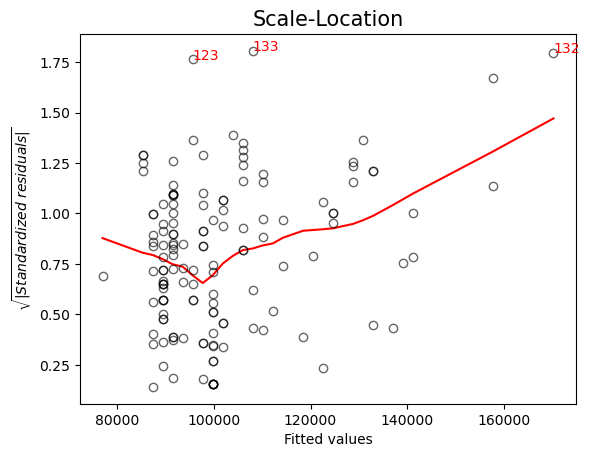

In [14]:
lmdiag.scale_loc(result1)

<module 'matplotlib.pyplot' from '/Users/kunia/opt/anaconda3/envs/practice2/lib/python3.9/site-packages/matplotlib/pyplot.py'>

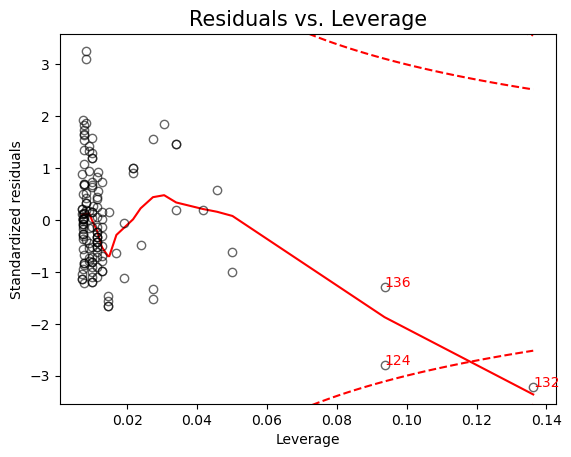

In [15]:
lmdiag.resid_lev(result1)

### 回帰診断まとめて４つ出す

<module 'matplotlib.pyplot' from '/Users/kunia/opt/anaconda3/envs/practice2/lib/python3.9/site-packages/matplotlib/pyplot.py'>

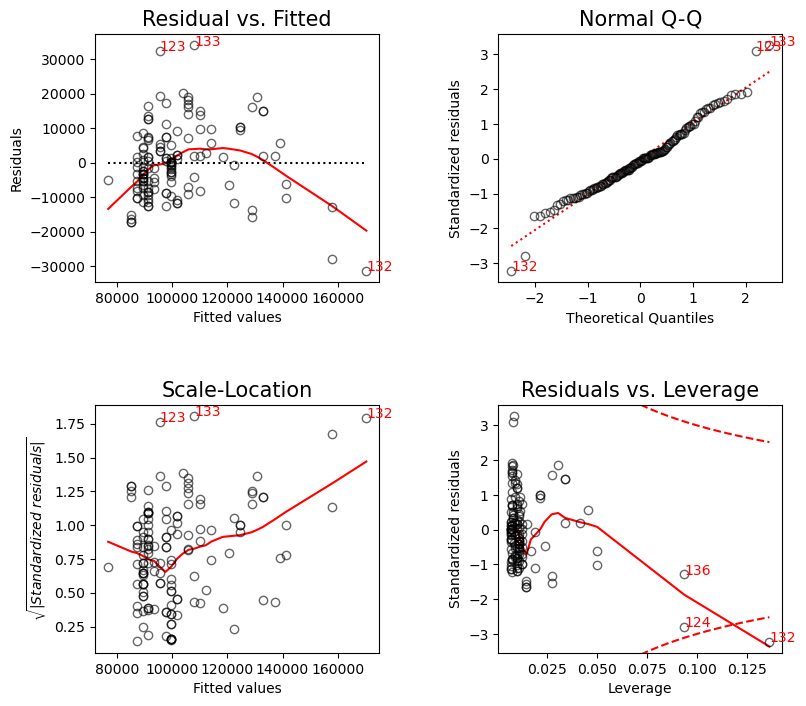

In [16]:
plt.figure(figsize=(8,7))
lmdiag.plot(result1)

/Users/kunia/opt/anaconda3/envs/practice2/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:1110: RuntimeWarning: invalid value encountered in sqrt
  resid_se = np.sqrt(res.mse_resid * (1 - infl.hat_matrix_diag))
/Users/kunia/opt/anaconda3/envs/practice2/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:696: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/Users/kunia/opt/anaconda3/envs/practice2/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:737: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_internal * np.sqrt(hii / (1 - hii))
/Users/kunia/opt/anaconda3/envs/practice2/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:766: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_external * np.sqrt(hii / (1 - hii))
/Users/kunia/opt/anaconda3/envs/practice2/lib/python3.9/site-packages/statsmodels/sta

ValueError: Axis limits cannot be NaN or Inf

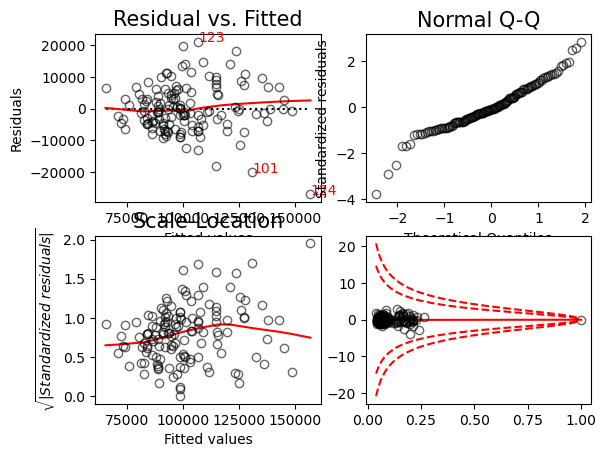

In [17]:
# TODO OLSで２変数以上の重回帰は出力できない？
# 多次元の時回帰診断は機能しないのではないか？（次元の呪い）
lmdiag.plot(result2)